# Visualize seed genes

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from config import PIPELINE_RUN_DIR, SEED_SETS, NETWORKS
from functions import split_seed_id, load_seed_stats, save_figure
prefix = "03"

Read data

In [2]:
seeds_meta_df = pd.DataFrame.from_dict(SEED_SETS)
network_meta_df = pd.DataFrame.from_dict(NETWORKS)

df = load_seed_stats()
print(df.to_string())

                                                   Seed file  Seeds  Not in network  Seeds total seed_id                                           network_id                                network
0    ALS.nedrex.reviewed_proteins_exp_high_confidence.Symbol     91              36          127     ALS  nedrex.reviewed_proteins_exp_high_confidence.Symbol               NeDRex (high confidence)
1                    UC.hippie.v2_3_medium_confidence.Symbol     74               2           76      UC                 hippie.v2_3_medium_confidence.Symbol             HIPPIE (medium confidence)
2                     ALS.hippie.v2_3_high_confidence.Symbol    102              25          127     ALS                   hippie.v2_3_high_confidence.Symbol               HIPPIE (high confidence)
3                  CD.string.human_links_v12_0_min900.Symbol     69               9           78      CD               string.human_links_v12_0_min900.Symbol            STRING (highest confidence)
4         UC.st

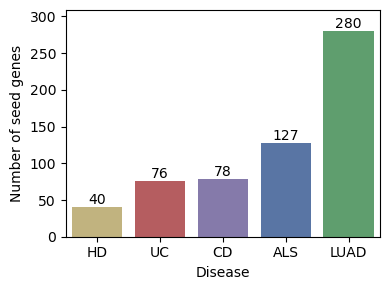

In [3]:
seed_sets_df = df[["seed_id", "Seeds total"]].drop_duplicates()
# Create bar plot
plt.figure(figsize=(4, 3))
ax = sns.barplot(data=seed_sets_df, x='seed_id', y='Seeds total', hue="seed_id", palette=dict(zip(seeds_meta_df.short, seeds_meta_df.color)), order=seeds_meta_df.short)

# Add value annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.0f}',  # You can format as needed
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=10,
        xytext=(0, 0), textcoords='offset points',
    )
ax.set_ylim(top=ax.get_ylim()[1] * 1.05)  # Increase y-axis limit by 5%

# Add labels and title
plt.ylabel('Number of seed genes')
plt.xlabel('Disease')
plt.tight_layout()
save_figure(plt.gcf(), f"{prefix}_seed_set_sizes")
plt.show()

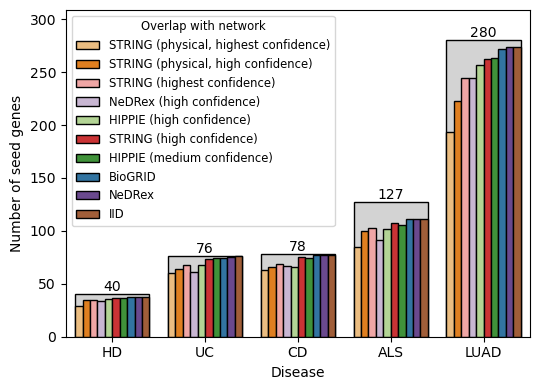

In [8]:
seed_sets_df = df[["seed_id", "Seeds total"]].drop_duplicates()
# Create bar plot
plt.figure(figsize=(5.5, 4))
ax = sns.barplot(data=seed_sets_df, x='seed_id', y='Seeds total', color = "lightgrey", order=seeds_meta_df.short, edgecolor='black')

# Add value annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.0f}',  # You can format as needed
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=10,
        xytext=(0, 0), textcoords='offset points',
    )
ax.set_ylim(top=ax.get_ylim()[1] * 1.05)  # Increase y-axis limit by 5%
ax = sns.barplot(data=df, x='seed_id', y='Seeds', hue="network", palette=dict(zip(network_meta_df.label, network_meta_df.color)), hue_order=network_meta_df.label, edgecolor='black', ax=ax)
ax.legend(title="Overlap with network", fontsize="small", title_fontsize="small")

# Add labels and title
plt.ylabel('Number of seed genes')
plt.xlabel('Disease')
plt.tight_layout()
save_figure(plt.gcf(), f"{prefix}_seed_set_sizes_network_overlap")
plt.show()
